In [ ]:
# TODO:
# Citiations with https://jupyterbook.org/en/stable/content/citations.html

# 1. Background

### Human activity recognition using Smartphone Data
Human activity recognition (HAR) refers to identifying and naming activities using Artificial Intelligence (AI) from raw data gathered through multiple devices. This raw data could come from wearable and electronic device sensors such as gyroscope and accelerometer. The data could also be from ordinary video cameras or devices like Kinect. [Gupta, N., Gupta, S.K., Pathak, R.K. et al. Human activity recognition in artificial intelligence framework: a narrative review. Artif Intell Rev 55, 4755–4808 (2022).https://doi.org/10.1007/s10462-021-10116-x](https://link.springer.com/article/10.1007/s10462-021-10116-x)

#### About the data

The original data comes from the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones#). In this notebook, however, we use a cleaned version of the same data provided by [thecleverprogrammer.com](https://thecleverprogrammer.com/)   

#### Make the necessary import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Load Data

In [ ]:
train = pd.read_csv("https://thecleverprogrammer.com/wp-content/uploads/2020/05/test.csv")
test = pd.read_csv("https://thecleverprogrammer.com/wp-content/uploads/2020/05/train-1.csv")

#### Try to understand the data

In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [ ]:
train.shape, test.shape

((2947, 563), (7352, 563))

In [ ]:
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)

In [ ]:
both['subject'].unique()

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24,  1,  3,  5,  6,  7,  8, 11, 14,
       15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30])

In [ ]:
label_counts = both['Activity'].value_counts()

<BarContainer object of 6 artists>

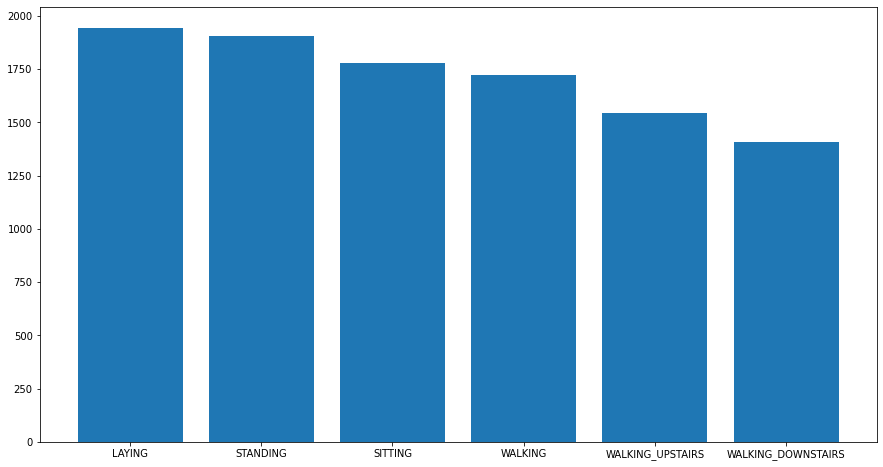

In [ ]:
plt.figure(figsize= (15, 8))
plt.bar(label_counts.index, label_counts)

## 3. Preprocessing data

Make a copy of the data 

In [ ]:
data = both['Data']
subject = both['subject']
copy = both.copy()
activity = both['Activity']
copy = copy.drop(['Data','subject','Activity'], axis =1)

#### Scaling

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
copy = slc.fit_transform(copy)

#### Dimensionality reduction

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
copy = pca.fit_transform(copy)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copy, activity, test_size = 0.2, random_state = 0)

## 4. Training

Setup variables

In [ ]:
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

### Train K-Neighbors Classifier 

In [ ]:
# Build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

## 5. Test

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       407
           SITTING       0.91      0.89      0.90       365
          STANDING       0.90      0.91      0.90       370
           WALKING       0.98      1.00      0.99       332
WALKING_DOWNSTAIRS       0.99      0.97      0.98       288
  WALKING_UPSTAIRS       0.99      1.00      0.99       298

          accuracy                           0.96      2060
         macro avg       0.96      0.96      0.96      2060
      weighted avg       0.96      0.96      0.96      2060



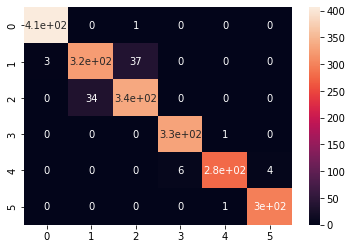

In [ ]:
# Comparing the test and predict results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)